In [31]:
import eda_mergedata_bivar_map_module as bimap
import numpy as np
import matplotlib.pyplot as plt

In [21]:
geo_file = 'geojson_files/Greenspace_US.geojson'
merge_file = 'merged_greenspace_mh.csv'

In [22]:
## combining geo_df and merge_df to a single dataframe
# laod geo_df and merge_df
geo_df = bimap.load_geo_df_files(geo_file)
merge_df = bimap.load_geo_df_files(merge_file)

# convert UC_Grouping to int
geo_df = bimap.convert_col_type(geo_df, 'UC_Grouping', int)
merge_df = bimap.convert_col_type(merge_df, 'UC_Grouping', int)

# drop columns that are not needed
up_merge_df = bimap.drop_cols(merge_df,['geometry'])

# merge the two dataframes
geo_merge_df = bimap.merge_dfs(geo_df,up_merge_df,'right','UC_Grouping','UC_Grouping')
print(type(geo_merge_df))
geo_merge_df.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>


,UC_Grouping,geometry,field_1,Population2010,MHLTH_AdjPrev,Latitude,Longitude,E_GR_AV14,E_GR_AT14,SDG_A2G14,...,P15,B15,BUCAP15,GDP15_SM,E_WR_T_14,State,INCM_CMI,DEV_CMI,E_BM_NM_LST,Cities in Urban Center_copy
0,485,"MULTIPOLYGON (((-86.77423 33.59792, -86.76305 ...",0,212237,15.6,33.50902518,-86.82365065,0.494568432,219.99623,0.773811615,...,196387.767,152.8946075,778.5342735,6184143360.0,17.49764442,AL,HIC,MDR,Temperate Broadleaf and Mixed Forests,Birmingham
1,501,"MULTIPOLYGON (((-86.64499 34.78006, -86.63372 ...",1,180105,13.4,34.72606498,-86.60999497,0.521521752,88.70099915,0.802598906,...,86467.06209,59.6740036,690.1356674,2498489088.0,16.32188892,AL,HIC,MDR,Temperate Broadleaf and Mixed Forests,Huntsville


In [26]:
# keep geometry, state, city, and mental health, one greenspace feature
important_col_list = ['geometry','State','E_WR_T_14','MHLTH_AdjPrev']

df_bimap_raw = bimap.extarct_imp_cols(geo_merge_df,important_col_list)
df_bimap_raw.head(2)

,geometry,State,E_WR_T_14,MHLTH_AdjPrev
0,"MULTIPOLYGON (((-86.77423 33.59792, -86.76305 ...",AL,17.49764442,15.6
1,"MULTIPOLYGON (((-86.64499 34.78006, -86.63372 ...",AL,16.32188892,13.4


In [27]:
# normalize df
fea_col = ['MHLTH_AdjPrev','E_WR_T_14']
df_bimap_nor = bimap.normalize_features(df_bimap_raw, fea_col)
df_bimap_nor.head(2)

,geometry,State,E_WR_T_14,MHLTH_AdjPrev
0,"MULTIPOLYGON (((-86.77423 33.59792, -86.76305 ...",AL,0.655885,0.745283
1,"MULTIPOLYGON (((-86.64499 34.78006, -86.63372 ...",AL,0.602726,0.537736


In [28]:
percentile = np.linspace(0.33, 1, 3)
colorlist = bimap.mikhailsirenko_colorscale(percentile=percentile)

In [29]:
bimap_df = bimap.assign_color_cells(df_bimap_nor, 'E_WR_T_14', 'c1_env', 'MHLTH_AdjPrev', 'c2_mh',percentile = percentile)
bimap_df.sample(5)

,geometry,State,E_WR_T_14,MHLTH_AdjPrev,c1_env,c2_mh
263,"MULTIPOLYGON (((-96.78145 43.57550, -96.73268 ...",SD,0.227799,0.150943,2,2
254,"MULTIPOLYGON (((-80.04352 40.58785, -80.03169 ...",PA,0.367188,0.462264,1,1
151,"MULTIPOLYGON (((-87.88117 42.48296, -87.86911 ...",IL,0.306102,0.547170,2,1
200,"MULTIPOLYGON (((-93.27809 37.25212, -93.26659 ...",MO,0.516766,0.669811,1,0
128,"MULTIPOLYGON (((-81.26943 29.60857, -81.25855 ...",FL,0.861941,0.584906,0,1


In [30]:
colorlist = bimap.mikhailsirenko_colorscale(
    percentile=np.linspace(0.33, 1, 3),
    color_list=['#ffb000', '#dc267f', '#648fff', '#785ef0'],
)

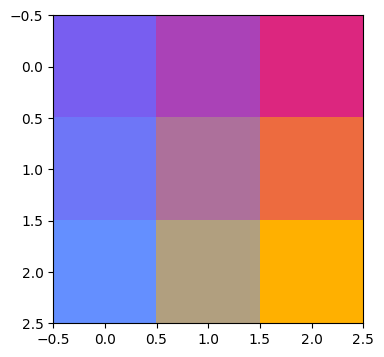

In [32]:
fig = plt.figure(figsize=(4, 4))
plt.imshow(colorlist, aspect="auto")

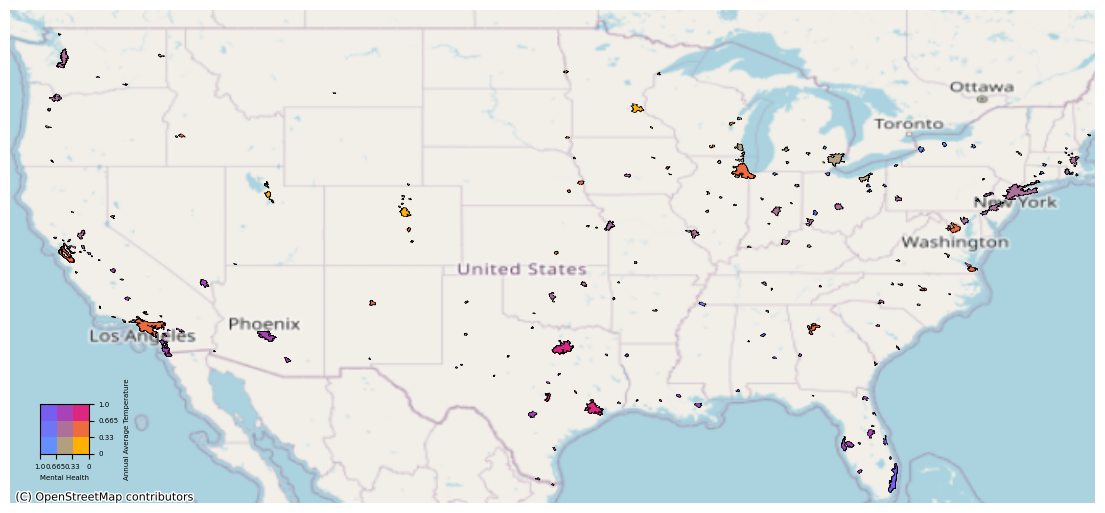

In [33]:
# create city-level bi-variate map
fig, ax = bimap.mat_subplots(1,1,fig_size = (14,20))
bimap.matplotlib_map(ax,bimap_df, 'c1_env', 'c2_mh', colorlist, xlim= [-125,-70], ylim = [25,50], figsize = (20,20))
bimap.set_off_axis(ax)
bimap.bicolor_legend(ax, colorlist, legend_position = [0,0.1,0.1,0.1], tick_fontsize = 5, label_fontsize = 5, x_label = 'Mental Health', y_label = 'Annual Average Temperature')

In [14]:
state_geo_file = 'cb_2018_us_state_500k/cb_2018_us_state_500k.shp'
state_gdf_raw = bimap.load_geo_df_files(state_geo_file)

state_gdf = state_gdf_raw[['STUSPS','geometry']].copy()
state_gdf.head(2)

,STUSPS,geometry
0,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."


In [15]:
state_merge_df = merge_df.copy()
 
state_keep_cols =['MHLTH_AdjPrev', 'E_WR_T_14', 'State']
state_drop_cols = [col for col in state_merge_df.columns if col not in state_keep_cols]
state_merge_df = bimap.drop_cols(state_merge_df, state_drop_cols)
state_geo_merge = bimap.merge_dfs(state_gdf, state_merge_df, 'right', 'STUSPS', 'State')
state_geo_merge_norm = bimap.normalize_features(state_geo_merge, ['MHLTH_AdjPrev', 'E_WR_T_14'])

state_geo_merge_norm.drop(columns = ['State'], inplace = True)

# group by state
state_group = state_geo_merge_norm.groupby(by = ['STUSPS','geometry']).mean().reset_index()

# assign colors to cells
state_bimap = bimap.assign_color_cells(state_group, 'E_WR_T_14', 'c1_env', 'MHLTH_AdjPrev', 'c2_mh')


In [16]:
geo_state = bimap.df_convert_gdf(state_bimap)
print(type(geo_state))
geo_state.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>


,STUSPS,geometry,MHLTH_AdjPrev,E_WR_T_14,c1_env,c2_mh
0,AK,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ...",0.273585,0.000000,2,2
1,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",0.675472,0.686733,0,0


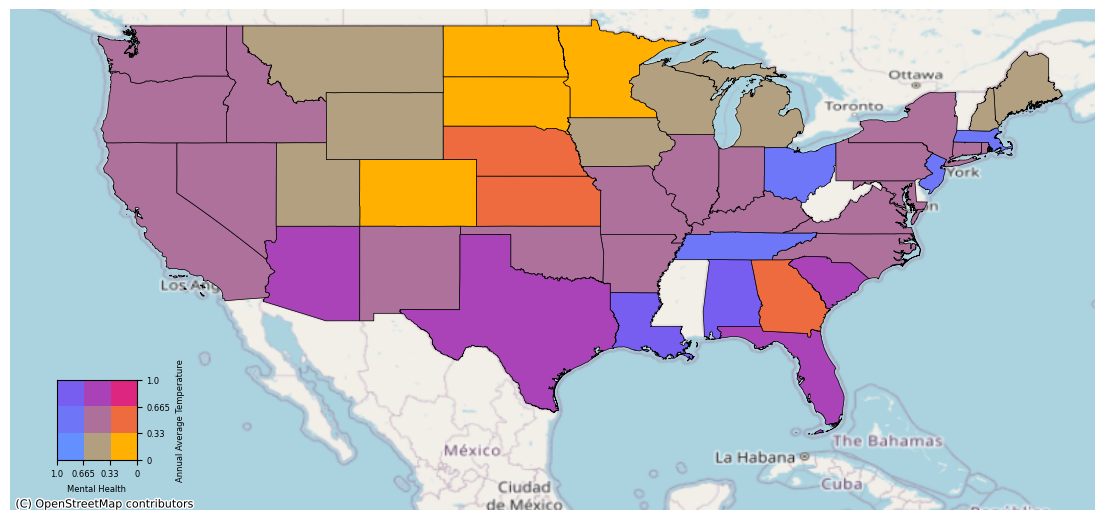

In [17]:
fig, ax_state = bimap.mat_subplots(1,1,fig_size = (14,20))
bimap.matplotlib_map(ax_state,geo_state, 'c1_env', 'c2_mh', colorlist, xlim= [-130,-65], ylim = [20,50], figsize = (20,20),line_width=0.5)
bimap.set_off_axis(ax_state)
bimap.bicolor_legend(ax_state, colorlist, legend_position = [0,0.1,0.16,0.16], tick_fontsize = 6, label_fontsize = 6, x_label = 'Mental Health', y_label = 'Annual Average Temperature')

In [18]:
bimap_df.head()

,geometry,State,E_WR_T_14,MHLTH_AdjPrev,c1_env,c2_mh
0,"MULTIPOLYGON (((-86.77423 33.59792, -86.76305 ...",AL,0.655885,0.745283,1,0
1,"MULTIPOLYGON (((-86.64499 34.78006, -86.63372 ...",AL,0.602726,0.537736,1,1
2,"MULTIPOLYGON (((-88.09412 30.77126, -88.07220 ...",AL,0.783129,0.688679,0,0
3,"MULTIPOLYGON (((-86.27305 32.41323, -86.22872 ...",AL,0.714978,0.669811,0,0
4,"MULTIPOLYGON (((-87.59002 33.24274, -87.54544 ...",AL,0.676946,0.735849,0,0


# Comparing two states

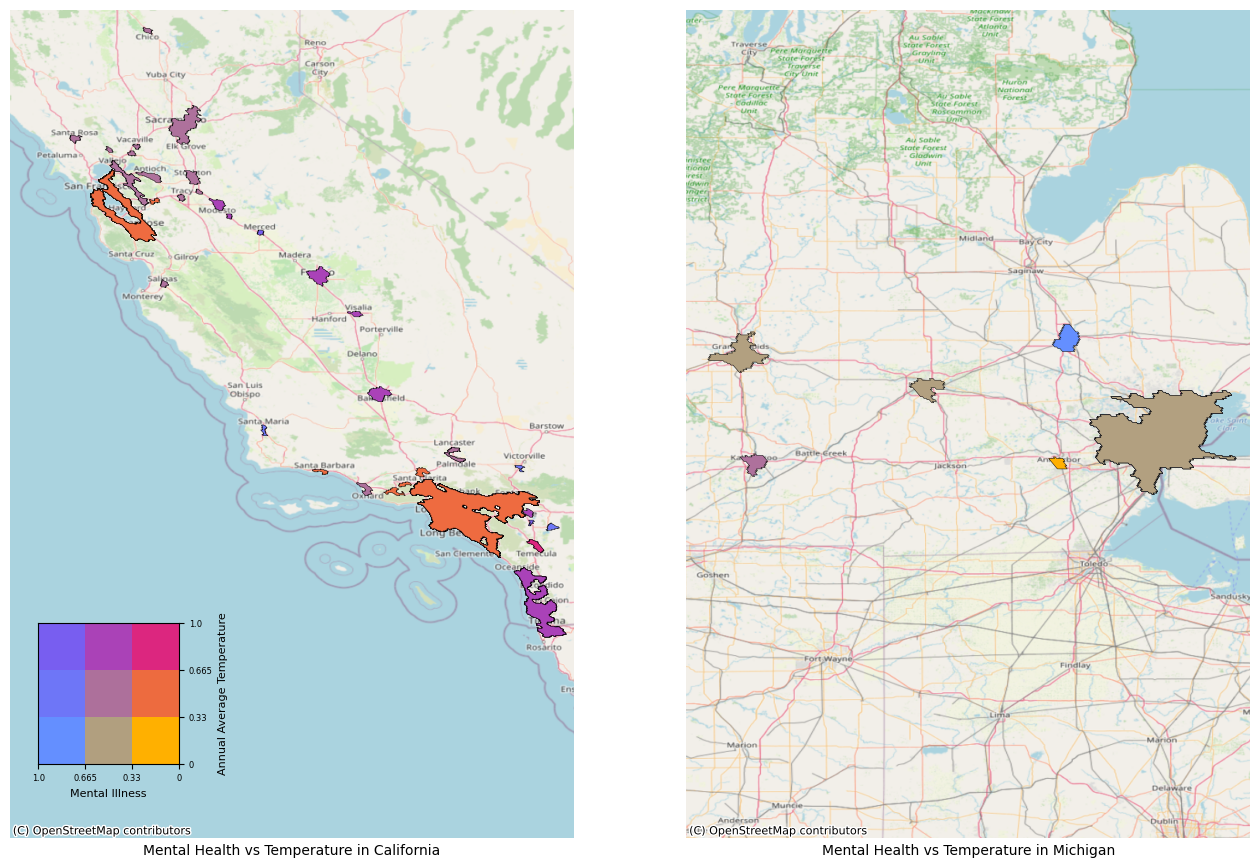

In [63]:
import matplotlib.pyplot as plt

df_ca = bimap_df[bimap_df['State'] == 'CA']
df_mi = bimap_df[bimap_df['State'] == 'MI']

def mat_subplots(n_row, n_col, fig_size = (20,6)):
    fig, axs = plt.subplots(n_row,n_col, figsize = fig_size)
    return fig, axs

fig, axs = bimap.mat_subplots(1,2, (16,16))
ax1,ax2 = axs[0], axs[1]
bimap.matplotlib_map(ax1, df_ca, 'c1_env', 'c2_mh', colorlist, xlim= [-123.5,-116.7], ylim = [30,40])
bimap.matplotlib_map(ax2, df_mi, 'c1_env', 'c2_mh', colorlist, xlim= [-86,-82.6], ylim = [40,45])
bimap.bicolor_legend(ax1, colorlist, legend_position = [0.05,0.05,0.25,0.25], tick_fontsize = 6, label_fontsize = 8, x_label = 'Mental Illness', y_label = 'Annual Average Temperature')
bimap.set_off_axis(ax1)
bimap.set_off_axis(ax2)

ax1.set_title('Mental Health vs Temperature in California', fontsize = 10,y=-0.03, loc= 'center')
_ =ax2.set_title('Mental Health vs Temperature in Michigan',fontsize = 10,y=-0.03, loc= 'center')


# show cities

In [91]:
city_df_raw = geo_merge_df.copy()
print(type(city_df_raw))

city_df_raw.rename(columns = {'Cities in Urban Center_copy':'City'}, inplace = True)
city_df_raw.sample(2)


<class 'geopandas.geodataframe.GeoDataFrame'>


,UC_Grouping,geometry,field_1,Population2010,MHLTH_AdjPrev,Latitude,Longitude,E_GR_AV14,E_GR_AT14,SDG_A2G14,...,P15,B15,BUCAP15,GDP15_SM,E_WR_T_14,State,INCM_CMI,DEV_CMI,E_BM_NM_LST,City
218,944,"MULTIPOLYGON (((-74.01109 41.17223, -73.97537 ...",218,195976,12.6,40.77321423,-73.88090455,0.493904612,5380.319619,0.299853443,...,15950674.29,3678.075928,230.5906234,675538000000.0,13.03097224,NY,HIC,MDR,Temperate Broadleaf and Mixed Forests,New York; Islip; Newark; Jersey City; Yonkers;...
28,9,"MULTIPOLYGON (((-122.27671 38.06511, -122.2651...",28,805235,9.8,37.32711544,-121.9332989,0.306727058,1713.386499,0.042396863,...,4604961.31,1307.057861,283.8368823,176059000000.0,15.53486609,CA,HIC,MDR,"Mediterranean Forests, Woodlands, and Scrub",San Jose; San Francisco; Oakland; Fremont; Sun...


In [93]:
important_col_list = ['geometry','UC_Grouping','E_WR_T_14','MHLTH_AdjPrev','City']
city_df = bimap.extarct_imp_cols(city_df_raw,important_col_list)
city_norm = bimap.normalize_features(city_df, ['MHLTH_AdjPrev', 'E_WR_T_14'])
city_bimap = bimap.assign_color_cells(city_norm, 'E_WR_T_14', 'c1_env', 'MHLTH_AdjPrev', 'c2_mh')
city_bimap.head(2)

,geometry,UC_Grouping,E_WR_T_14,MHLTH_AdjPrev,City,c1_env,c2_mh
0,"MULTIPOLYGON (((-86.77423 33.59792, -86.76305 ...",485,0.655885,0.745283,Birmingham,1,0
1,"MULTIPOLYGON (((-86.64499 34.78006, -86.63372 ...",501,0.602726,0.537736,Huntsville,1,1


In [68]:
city_bimap[city_bimap['UC_Grouping'] ==139]

,geometry,UC_Grouping,E_WR_T_14,MHLTH_AdjPrev,City,c1_env,c2_mh
314,"MULTIPOLYGON (((-122.21799 48.01459, -122.1923...",139,0.423611,0.047170,Seattle; Tacoma; Bellevue; Everett,1,2
315,"MULTIPOLYGON (((-122.21799 48.01459, -122.1923...",139,0.423611,0.481132,Seattle; Tacoma; Bellevue; Everett,1,1
316,"MULTIPOLYGON (((-122.21799 48.01459, -122.1923...",139,0.423611,0.188679,Seattle; Tacoma; Bellevue; Everett,1,2
317,"MULTIPOLYGON (((-122.21799 48.01459, -122.1923...",139,0.423611,0.509434,Seattle; Tacoma; Bellevue; Everett,1,1


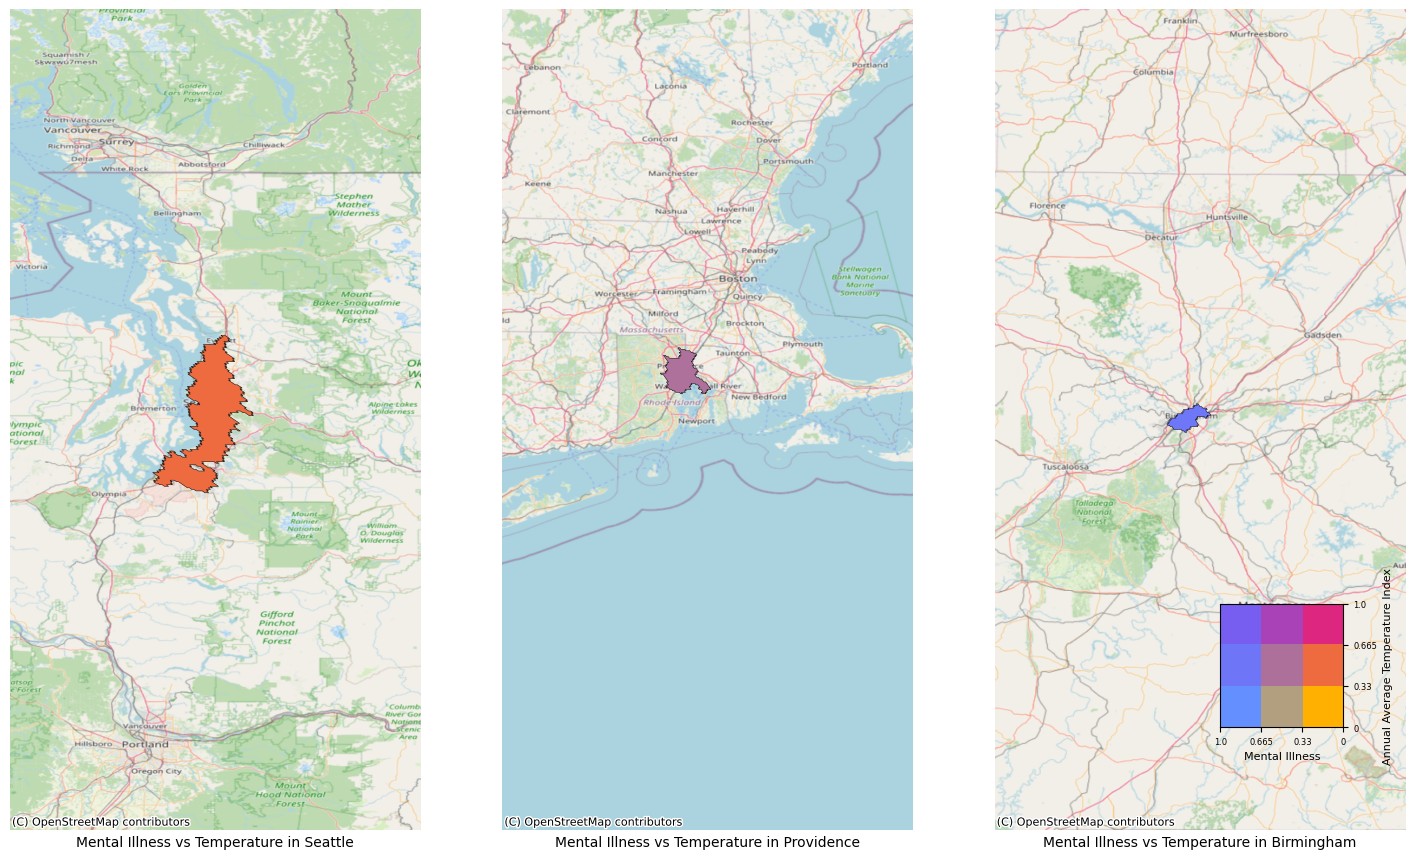

In [109]:
fig, axes = bimap.mat_subplots(1,3,fig_size = (18,18))
ax1, ax2, ax3= axes[0], axes[1], axes[2]
#xlim= [-130,-65], ylim = [20,50]

bimap.matplotlib_map(ax1, city_bimap[city_bimap['UC_Grouping'] ==139].head(1), 'c1_env', 'c2_mh', colorlist, xlim= [-123.5,-121], ylim = [45,50], figsize = (8,10))
bimap.matplotlib_map(ax2, city_bimap[city_bimap['UC_Grouping'] ==1008].head(1), 'c1_env', 'c2_mh', colorlist,xlim= [-72.5,-70], ylim = [39,44], figsize = (8,10))
bimap.matplotlib_map(ax3, city_bimap[city_bimap['UC_Grouping'] ==485].head(1), 'c1_env', 'c2_mh', colorlist, xlim= [-88,-85.5], ylim = [31,36], figsize = (8,10))

bimap.set_off_axis(ax1)
bimap.set_off_axis(ax2)
bimap.set_off_axis(ax3)

bimap.bicolor_legend(
    ax3,
    colorlist,
    legend_position=[0.55, 0.05, 0.3, 0.3],
    tick_fontsize=6,
    label_fontsize=8,
    x_label="Mental Illness",
    y_label="Annual Average Temperature Index",
    percentile = np.linspace(0.33, 1, 3)[::-1].tolist()
)

ax1.set_title('Mental Illness vs Temperature in Seattle', fontsize = 10,y=-0.03, loc= 'center')
ax2.set_title('Mental Illness vs Temperature in Providence',fontsize = 10,y=-0.03, loc= 'center')
_ =ax3.set_title('Mental Illness vs Temperature in Birmingham',fontsize = 10,y=-0.03, loc= 'center')